## Краткое вступление в работу 

В данной работе необходимо провести анализ  в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед анализом необходимо предработать данные: 
- Преобразовать данные в нужные типы. 
- Обработать пропуски при необходимости. 
Провести исследовательский анализ: 
- Посмотреть сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотреть, как менялись продажи по платформам. Выберать платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Взять данные за соответствующий актуальный период. 
- Какие платформы лидируют по продажам, растут или падают? .
- Построить график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. 
- Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
- Соотнесите выводы с продажами игр на других платформах.
- Посмотреть на общее распределение игр по жанрам. 

Описать портрет каждого пользователя и проверить гипотезы: 

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

Описание данных:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.



## Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd 
from nltk.stem import SnowballStemmer
import numpy as np
import scipy.stats
game_data = pd.read_csv('/datasets/games.csv')

In [2]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Знакомимся с общей информацией о таблице. Видим пропуски в столбцах: Name, Year_of_Release,Genre,Critic_Score,User_Score,Rating. И типом данных, который нам необходимо перевести в соответствующий тип, для корректной работы.    

## Шаг 2. Подготовьте данные. 

Открыли таблицу.

In [3]:
game_data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
game_data.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score','rating']


Привели наименование столбцов к нижнему регистру. 

Смотрим количество пропусков в столбцах. 

In [5]:
names = (game_data['name'],game_data['year_of_release'], game_data['genre'],game_data['critic_score'],game_data['user_score'],game_data['rating'])
for i in names: 
    print(i,'количество пропусков:', i.isnull().sum())

0                           Wii Sports
1                    Super Mario Bros.
2                       Mario Kart Wii
3                    Wii Sports Resort
4             Pokemon Red/Pokemon Blue
                     ...              
16710    Samurai Warriors: Sanada Maru
16711                 LMA Manager 2007
16712          Haitaka no Psychedelica
16713                 Spirits & Spells
16714              Winning Post 8 2016
Name: name, Length: 16715, dtype: object количество пропусков: 2
0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16710    2016.0
16711    2006.0
16712    2016.0
16713    2003.0
16714    2016.0
Name: year_of_release, Length: 16715, dtype: float64 количество пропусков: 269
0              Sports
1            Platform
2              Racing
3              Sports
4        Role-Playing
             ...     
16710          Action
16711          Sports
16712       Adventure
16713        Platform
16714      Simulation
Name: gen

Заполняем пропуски в необходимых стобцах. В столбцах  critic_score, user_score,rating  решила заменить значением маркером. Удалять пропуски не стоит, так как мы можем потерять часть продаж. Да и когда будем проводить анализ  сравнения оценок критиков и пользователей, можно было их легко отфильтровать.
Возможно это технологическая ошибка, при попытке считать значения автоматически, либо оценки на самом деле отсуствовали. 

В столбцах genre и name заменяю на 'неизвестного'. Скорее это  техническая ошибка. 

In [6]:
game_data['critic_score']  = game_data['critic_score'].fillna(value = '-1')
game_data.loc[game_data['user_score'] == "tbd", 'user_score'] = '-1'
game_data['user_score']  = game_data['user_score'].fillna(value = '-1')
game_data['rating']  = game_data['rating'].fillna(value = '-1')
game_data['genre']  = game_data['genre'].fillna(value = 'unknown')
game_data['name']  = game_data['name'].fillna(value = 'unknown')
game_data['user_score']  = game_data['user_score'].fillna(value = '-1')
game_data['user_score'] = game_data['user_score'].astype(float)
game_data['critic_score'] = game_data['critic_score'].astype(float)

Пропуски в столбце year_of_release заменяем медианным значением в зависимости в от платформы. 

In [7]:
median = game_data.groupby('platform')['year_of_release'].median()    
 
def year_median(row):
    platform = row['platform']
    year = row['year_of_release']
   
    if platform in median.index:
        return median[platform]
    return year
game_data.loc[game_data['year_of_release'].isnull(),'year_of_release'] = game_data.apply(year_median, axis = 1)
game_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,-1
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,-1
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,-1
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,-1
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,-1
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,-1


Здесь округляю значения в большую сторону, так как есть значения которые приближенные к нулю и потерять их не хотелось бы, поэтому принято данное решение. После округления переводим тип данных к соответствующему типу, для корректной работы в дальнейшем. 

In [8]:
game_data['other_sales'] = game_data['other_sales'].apply(np.ceil)
game_data['na_sales'] = game_data['na_sales'].apply(np.ceil)
game_data['eu_sales'] = game_data['eu_sales'].apply(np.ceil)
game_data['jp_sales'] = game_data['jp_sales'].apply(np.ceil)
game_data['critic_score'] = game_data['critic_score'].apply(np.ceil)
game_data['user_score'] = game_data['user_score'].apply(np.ceil)
game_data['other_sales'] = game_data['other_sales'].astype(int)
game_data['na_sales'] = game_data['na_sales'].astype(int)
game_data['eu_sales'] = game_data['eu_sales'].astype(int)
game_data['jp_sales'] = game_data['jp_sales'].astype(int)
game_data['year_of_release'] = game_data['year_of_release'].astype(int)
game_data['user_score'] = game_data['user_score'].astype(int)
game_data['critic_score'] = game_data['critic_score'].astype(int)

In [9]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16715 non-null object
na_sales           16715 non-null int64
eu_sales           16715 non-null int64
jp_sales           16715 non-null int64
other_sales        16715 non-null int64
critic_score       16715 non-null int64
user_score         16715 non-null int64
rating             16715 non-null object
dtypes: int64(7), object(4)
memory usage: 1.4+ MB


Смотрим конечный результат, вроде бы всё корректно. 

Считаем суммарные продажи во всех регионах и записываем  их в отдельный столбец.

In [10]:
game_data['sum_sales'] = game_data['na_sales']+game_data['eu_sales']+game_data['jp_sales'] + game_data['other_sales']

In [11]:
game_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,42,29,4,9,76,8,E,84
1,Super Mario Bros.,NES,1985,Platform,30,4,7,1,-1,-1,-1,42
2,Mario Kart Wii,Wii,2008,Racing,16,13,4,4,82,9,E,37
3,Wii Sports Resort,Wii,2009,Sports,16,11,4,3,80,8,E,34
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,12,9,11,1,-1,-1,-1,33
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0,0,1,0,-1,-1,-1,1
16711,LMA Manager 2007,X360,2006,Sports,0,1,0,0,-1,-1,-1,1
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0,0,1,0,-1,-1,-1,1
16713,Spirits & Spells,GBA,2003,Platform,1,0,0,0,-1,-1,-1,1


## Шаг 3. 

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Данные важны не за весь период, который здесь представлен. В дальнейшем нам необходимо ответить на вопрос об актуальном периоде для ответа на данный вопрос, надо рассмотреть платформы, которые в настоящее время находятся на пике и приносят прибыль.

In [12]:
game_data.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      53
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     290
1998     386
1999     341
2000     350
2001     482
2002     829
2003     800
2004     783
2005     973
2006    1006
2007    1197
2008    1457
2009    1476
2010    1302
2011    1161
2012     653
2013     552
2014     582
2015     606
2016     502
Name: name, dtype: int64

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [13]:
game = game_data.groupby('platform')['sum_sales'].value_counts().sort_values(ascending = False)
game

platform  sum_sales
PS2       3            1187
DS        1             943
PSP       1             694
X360      3             588
PS        3             577
                       ... 
PCFX      1               1
PS        11              1
          12              1
          13              1
XOne      10              1
Name: sum_sales, Length: 268, dtype: int64

In [14]:
game_data_head = game_data.sort_values(by = 'sum_sales', ascending= False).head(100)
game_data_head

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,42,29,4,9,76,8,E,84
1,Super Mario Bros.,NES,1985,Platform,30,4,7,1,-1,-1,-1,42
2,Mario Kart Wii,Wii,2008,Racing,16,13,4,4,82,9,E,37
3,Wii Sports Resort,Wii,2009,Sports,16,11,4,3,80,8,E,34
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,12,9,11,1,-1,-1,-1,33
...,...,...,...,...,...,...,...,...,...,...,...,...
87,Star Wars Battlefront (2015),PS4,2015,Shooter,3,4,1,2,-1,-1,-1,10
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,3,4,1,2,83,6,M,10
80,Mario Party 8,Wii,2007,Misc,4,3,2,1,62,7,E,10
83,Pokemon Black 2/Pokemon White 2,DS,2012,Role-Playing,3,2,4,1,-1,-1,-1,10


Строим график по отсортированной таблице по суммарной выручке, для этого построена сводная таблица по платформам, чтобы наглядно посмотреть. Далее по данной сводной таблице мы находим среднее, для того, чтобы ответить на вопрос: За какой характерный срок появляются новые и исчезают старые платформы?.  

year_of_release    5.882353
dtype: float64

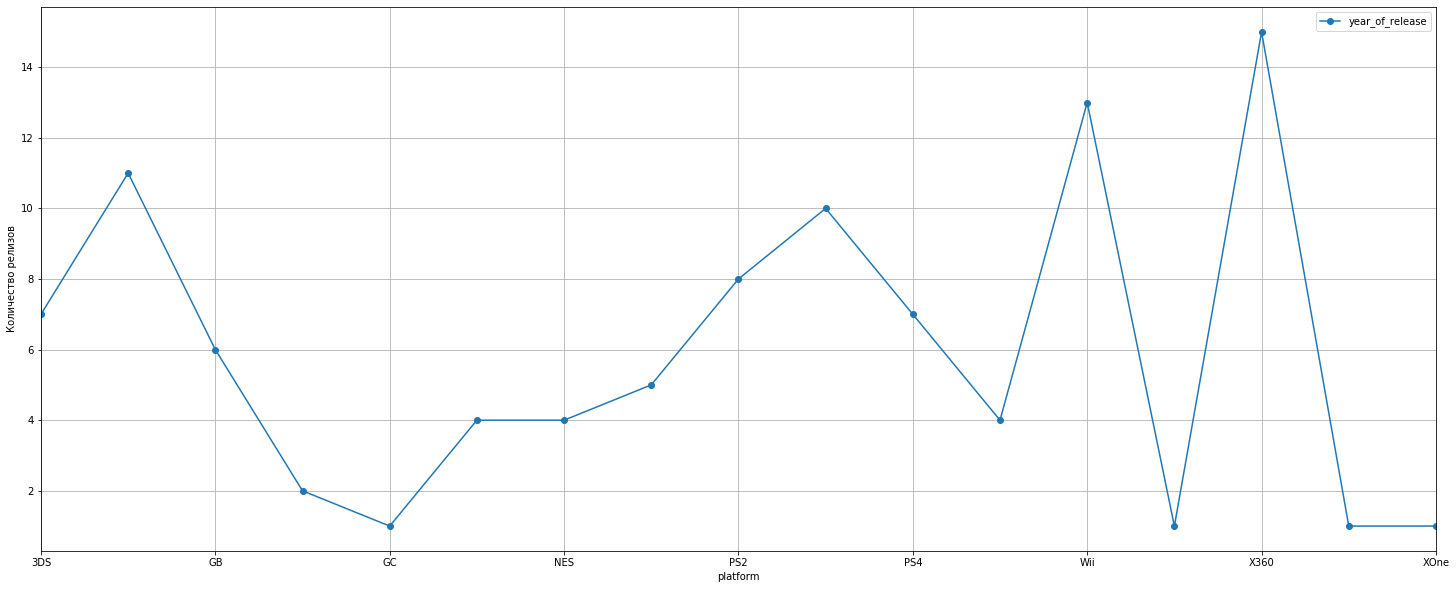

In [15]:
platform_pivot = game_data_head.pivot_table(index = 'platform', values = 'year_of_release', aggfunc = 'count')
ax = platform_pivot.plot(grid = True, figsize = (25, 10), style = 'o-')
ax.set_ylabel('Количество релизов')
platform_pivot.mean()

Выбераем  платформы с наибольшими суммарными продажами и строим распределение по годам. 

Text(0, 0.5, 'Суммарная выручка')

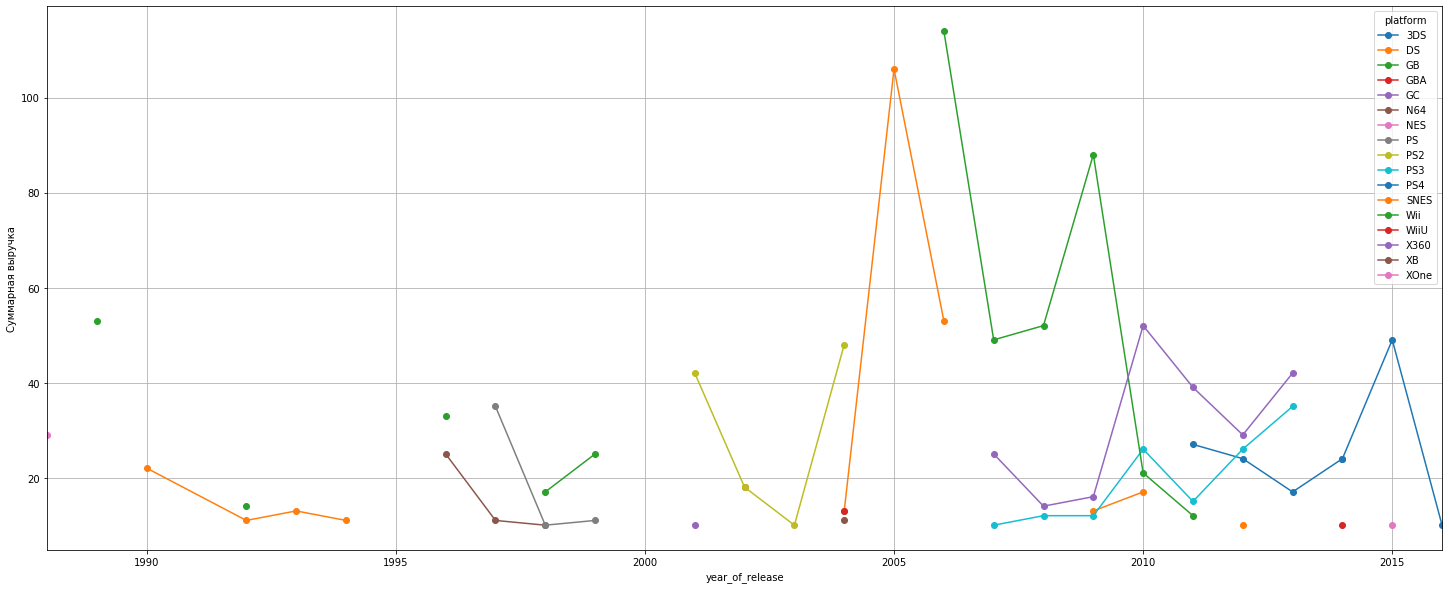

In [16]:
platform_pivot2 = game_data_head.pivot_table(index = 'year_of_release',columns = 'platform', values = 'sum_sales', aggfunc = 'sum')
ax = platform_pivot2.query('year_of_release > 1985').plot(grid = True, figsize = (25, 10), style = '-o')
ax.set_ylabel('Суммарная выручка')


Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [17]:
platform_pivot2 = platform_pivot2.fillna(value = 0)
platform_pivot2 = platform_pivot2.query('year_of_release > 2005').drop(platform_pivot2.columns[[2, 3, 4, 5, 6, 7,8,11,15, 16]], axis=1)
platform_pivot2

platform,3DS,DS,PS3,PS4,Wii,WiiU,X360
year_of_release,,,,,,,
2006,0.0,53.0,0.0,0.0,114.0,0.0,0.0
2007,0.0,0.0,10.0,0.0,49.0,0.0,25.0
2008,0.0,0.0,12.0,0.0,52.0,0.0,14.0
2009,0.0,13.0,12.0,0.0,88.0,0.0,16.0
2010,0.0,17.0,26.0,0.0,21.0,0.0,52.0
2011,27.0,0.0,15.0,0.0,12.0,0.0,39.0
2012,24.0,10.0,26.0,0.0,0.0,0.0,29.0
2013,17.0,0.0,35.0,0.0,0.0,0.0,42.0
2014,24.0,0.0,0.0,24.0,0.0,10.0,0.0


По результатам актуальным периодом является с 2006 по 2016. С выбраннами платформами, которые более менее приносят прибыль по настоящее время. 

Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.

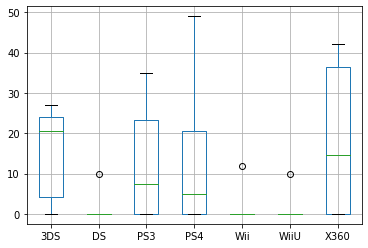

In [18]:
platform_pivot2.query('year_of_release > 2010').boxplot()

Судя по графику разница в продажах между платформами есть. Безусловным лидером является платформа X360. 

In [19]:
DS3 = platform_pivot2['3DS'].describe()
DS = platform_pivot2['DS'].describe()
PS3 = platform_pivot2['PS3'].describe()
PS4 = platform_pivot2['PS4'].describe()
Wii = platform_pivot2['Wii'].describe()
WiiU = platform_pivot2['WiiU'].describe()
X360 = platform_pivot2['X360'].describe()

describe_data = pd.DataFrame({ "3DS": DS3, 
                                "DS": DS, 
                                "PS3": PS3,
                                "PS4": PS4, 
                                "Wii" :Wii, 
                                 "WiiU":WiiU, 
                                 "X360":X360})
describe_data

,3DS,DS,PS3,PS4,Wii,WiiU,X360
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,8.363636,8.454545,12.363636,7.545455,30.545455,0.909091,19.727273
std,11.834464,16.064642,12.282286,15.654799,40.207869,3.015113,19.042536
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,12.000000,0.000000,12.000000,0.000000,16.000000
75%,20.500000,11.500000,20.500000,5.000000,50.500000,0.000000,34.000000
max,27.000000,53.000000,35.000000,49.000000,114.000000,10.000000,52.000000


Построили таблицу с числовыми характеристиками методом describe() для сравнения среднего. По данным видим, что в среднем платформа X360 лидирует как и Wii. От них отстают платфoрмы 3DS, DS, PS3, PS4.

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


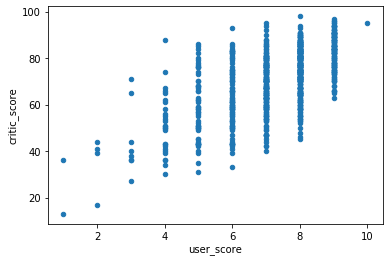

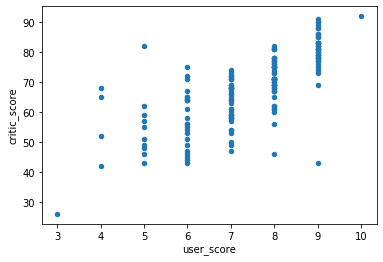

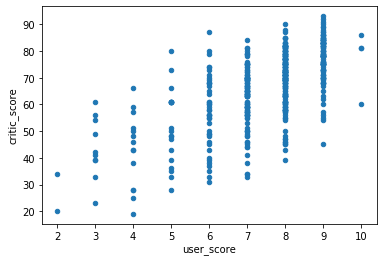

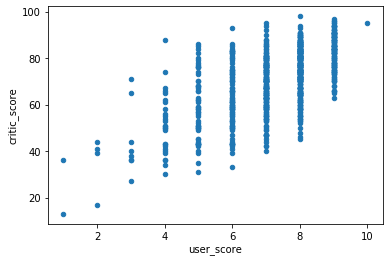

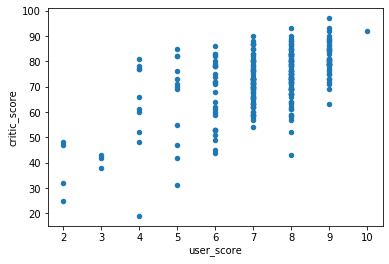

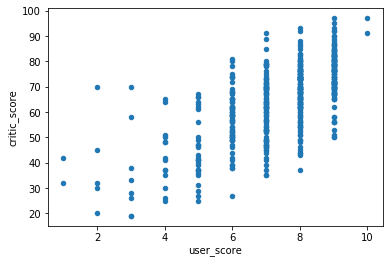

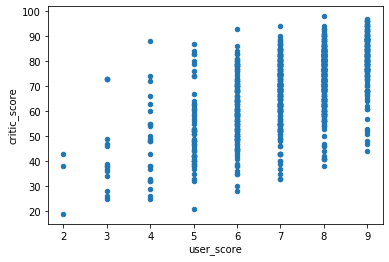

In [68]:
DS3_plot = game_data.query('platform == "3DS" and user_score not in "-1" and critic_score not in "-1" ')
DS_plot = game_data.query('platform == "DS" and user_score not in "-1" and critic_score not in "-1" ')
PS3_plot = game_data.query('platform == "PS3" and user_score not in "-1" and critic_score not in "-1" ')
PS4_plot = game_data.query('platform == "PS4" and user_score not in "-1" and critic_score not in "-1"')
Wii_plot = game_data.query('platform == "Wii" and user_score not in "-1" and critic_score not in "-1"')
X360_plot = game_data.query('platform == "X360" and user_score not in "-1" and critic_score not in "-1" ')
names = (PS3_plot,DS3_plot, DS_plot,PS3_plot,PS4_plot,Wii_plot, X360_plot)
for i in names: 
    print(i.plot(x='user_score', y='critic_score',  kind='scatter'))

In [69]:
DS3_corr = DS3_plot['user_score'].corr(DS3_plot['critic_score'])
DS_corr = DS_plot['user_score'].corr(DS_plot['critic_score'])
PS3_corr = PS3_plot['user_score'].corr(PS3_plot['critic_score'])
PS4_corr = PS4_plot['user_score'].corr(PS4_plot['critic_score'])
Wii_corr = Wii_plot['user_score'].corr(Wii_plot['critic_score'])
X360_corr = X360_plot['user_score'].corr(X360_plot['critic_score'])
corr = ({ 'DS3_corr': DS3_corr,
                            'DS_corr' : DS_corr,
                            'PS3_corr': PS3_corr, 
                             'PS4_corr': PS4_corr,
                              'Wii_corr' :Wii_corr,
                               'X360_corr': X360_corr})
data_corr = pd.DataFrame(data=corr,index = [1])
data_corr

,DS3_corr,DS_corr,PS3_corr,PS4_corr,Wii_corr,X360_corr
1,0.729342,0.649641,0.624376,0.566712,0.672051,0.603185


 Видим, что корреляция небольшая, точнее связь этих данных не настолько сильна, она есть, однако не слишком сильная.

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Text(0.5, 0, 'Жанры')

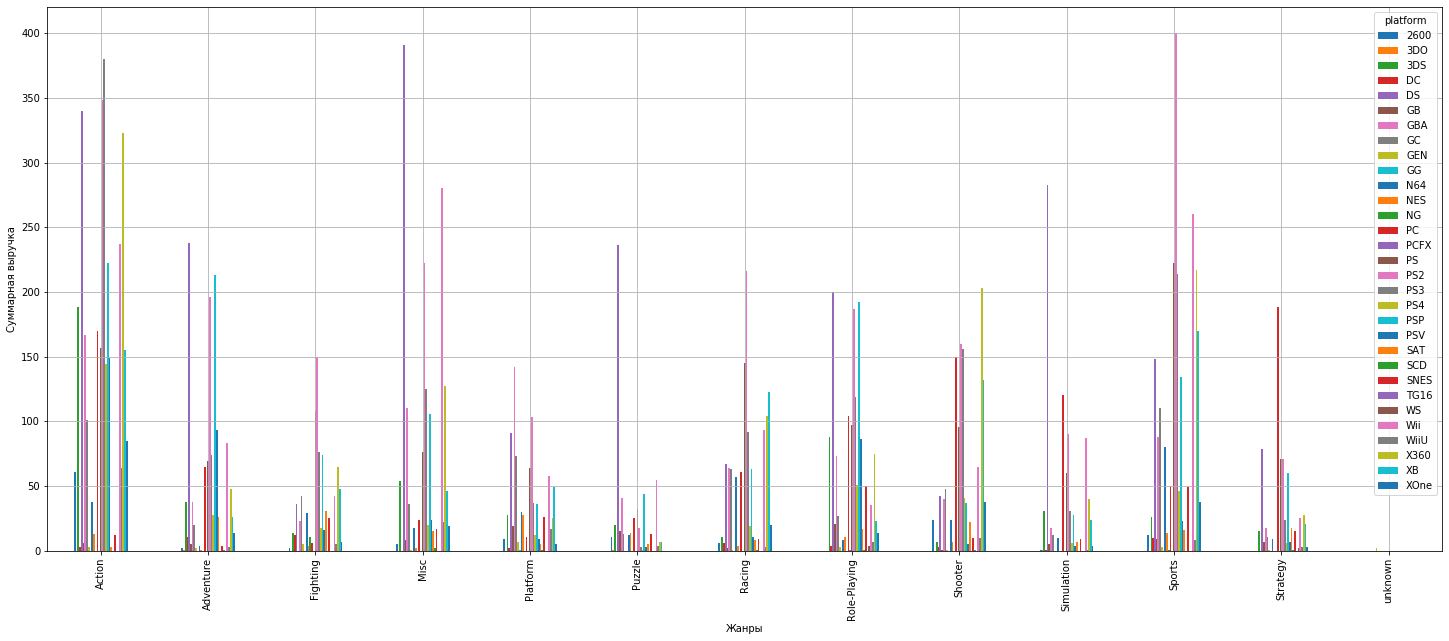

In [22]:
genre_sort = game_data.sort_values(by = 'genre', ascending= False)
genre_sort
genre = genre_sort.pivot_table(index = 'genre',columns = 'platform', values = 'sum_sales', aggfunc = 'count')
ax1 = genre.plot(grid = True, figsize = (25, 10), kind ='bar')
ax1.set_ylabel('Суммарная выручка')
ax1.set_xlabel('Жанры')

Можно отметить, что самым продаваемым жанром является action, sports, misc, это зависимая величина и зависит она от платформы.В этих жанрах в зависимости от платформы есть и низкие продажи. Жанры с самой  низкой продаваемостью: fighting, platform.
Теперь мы понимаем,какой жанр пользуется спросом, а какой нет.


## Шаг 4. Составьте портрет пользователя каждого региона.

Самые популярные платформы (топ-5). Опишите различия в долях продаж. 

In [40]:
game_data.sort_values(by = 'na_sales', ascending = False).head(11)
na_sales = game_data.pivot_table(index = ['platform','genre'], values = ['na_sales', 'sum_sales', 'rating']).sort_values(by = 'na_sales', ascending = False).head(11)
eu_sales = game_data.pivot_table(index = ['platform','genre'], values = ['eu_sales' , 'sum_sales', 'rating']).sort_values(by = 'eu_sales', ascending = False).head(11)
jp_sales = game_data.pivot_table(index = ['platform','genre'], values = ['jp_sales', 'sum_sales', 'rating']).sort_values(by = 'jp_sales', ascending = False).head(25)
other_sales = game_data.pivot_table(index = ['platform','genre'], values = ['other_sales', 'sum_sales', 'rating']).sort_values(by = 'other_sales', ascending = False).head(11)

In [24]:
na_sales['sales_share'] = na_sales['na_sales']/na_sales['sum_sales']
na_sales

na_sales  sum_sales  sales_share
platform genre                                      
NES      Shooter    4.571429   7.428571     0.615385
         Adventure  3.000000   7.000000     0.428571
         Platform   2.321429   5.642857     0.411392
GB       Puzzle     2.266667   4.800000     0.472222
GEN      Platform   2.000000   4.571429     0.437500
GB       Adventure  2.000000   5.400000     0.370370
2600     Platform   2.000000   4.000000     0.500000
WiiU     Racing     2.000000   5.666667     0.352941
GB       Platform   1.842105   4.736842     0.388889
2600     Puzzle     1.818182   3.363636     0.540541
NES      Racing     1.750000   4.750000     0.368421

Пополярные платформы в северной америке: NES, GB,GEN, 2600, WiiU. 

In [41]:
eu_sales['sales_share'] = eu_sales['eu_sales']/eu_sales['sum_sales']
jp_sales['sales_share'] = jp_sales['jp_sales']/jp_sales['sum_sales']
other_sales['sales_share'] = other_sales['other_sales']/other_sales['sum_sales']
other_sales

,,other_sales,sum_sales,sales_share
platform,genre,,,
PS4,Shooter,1.02439,4.609756,0.222222
GB,Racing,1.00000,4.500000,0.222222
PS4,Racing,1.00000,3.421053,0.292308
WiiU,Simulation,1.00000,3.000000,0.333333
SCD,Platform,1.00000,4.000000,0.250000
3DS,Racing,1.00000,4.000000,0.250000
PSV,Shooter,1.00000,4.000000,0.250000
GB,Shooter,1.00000,4.000000,0.250000
XOne,Fighting,1.00000,3.285714,0.304348


Топ 5 в других регионах: PS4,GB, WiiU,SCD, 3DS.

In [26]:
eu_sales

eu_sales  sum_sales  sales_share
platform genre                                         
WiiU     Racing        1.666667   5.666667     0.294118
PS4      Shooter       1.487805   4.609756     0.322751
         Sports        1.239130   3.434783     0.360759
GB       Adventure     1.200000   5.400000     0.222222
         Role-Playing  1.142857   5.142857     0.222222
PS       Platform      1.125000   3.468750     0.324324
WiiU     Platform      1.117647   3.882353     0.287879
PS3      Shooter       1.108974   3.910256     0.283607
PS4      Racing        1.105263   3.421053     0.323077
3DS      Racing        1.090909   4.000000     0.272727
PC       Role-Playing  1.076923   2.211538     0.486957

Топ 5 в европейской части: WiiU, PS4, GB,PS, WiiU. 

In [42]:
jp_sales

jp_sales  sum_sales  sales_share
platform genre                                         
NES      Misc          2.500000   3.000000     0.833333
GB       Role-Playing  2.285714   5.142857     0.444444
NES      Role-Playing  2.090909   2.909091     0.718750
         Adventure     2.000000   7.000000     0.285714
         Sports        1.785714   4.071429     0.438596
         Platform      1.571429   5.642857     0.278481
         Fighting      1.500000   4.000000     0.375000
         Racing        1.500000   4.750000     0.315789
SNES     Platform      1.461538   4.461538     0.327586
GB       Strategy      1.428571   2.142857     0.666667
         Adventure     1.400000   5.400000     0.259259
         Simulation    1.400000   1.800000     0.777778
         Misc          1.375000   3.750000     0.366667
         Platform      1.368421   4.736842     0.288889
SNES     Role-Playing  1.360000   1.660000     0.819277
         Racing        1.333333   2.555556     0.521739
GB       Puzzle        1.333333   4.800000     0.277778
NES      Shooter       1.285714   7.428571     0.173077
         Action        1.230769   4.538462     0.271186
3DS      Role-Playing  1.215909   2.829545     0.429719
SNES     Fighting      1.200000   2.200000     0.545455
NES      Puzzle        1.142857   3.500000     0.326531
SNES     Action        1.083333   2.416667     0.448276
         Puzzle        1.076923   1.153846     0.933333
SAT      Fighting      1.032258   1.225806     0.842105

Топ 5 в Японии: NES, GB, SNES, 3DS, SAT.

Большая доля продаж в Японии, на втором месте в северной америке за ними идут в европейской части, далее в других странах.

Самые популярные жанры (топ-5). Поясните разницу.

In [60]:
jp_genre = game_data.pivot_table(index = 'genre', values = 'jp_sales').sort_values(by = 'jp_sales', ascending = False).head(5)
jp_genre

,jp_sales
genre,
Role-Playing,0.815087
Adventure,0.580967
Fighting,0.570082
unknown,0.500000
Strategy,0.405564


In [59]:
eu_genre = game_data.pivot_table(index = 'genre', values = 'eu_sales').sort_values(by = 'eu_sales', ascending = False).head(5)
eu_genre

,eu_sales
genre,
Shooter,0.913832
Platform,0.905405
Racing,0.879103
Action,0.773820
Sports,0.730409


In [58]:
other_genre = game_data.pivot_table(index = 'genre', values = 'other_sales').sort_values(by = 'other_sales', ascending = False).head(5)
other_genre

,other_sales
genre,
Shooter,0.721088
Racing,0.698159
Sports,0.685264
Platform,0.684685
Action,0.651825


In [57]:
na_genre = game_data.pivot_table(index = 'genre', values = 'na_sales').sort_values(by = 'na_sales', ascending = False).head(6)
na_genre

,na_sales
genre,
Platform,1.188063
Shooter,1.108844
unknown,1.000000
Racing,0.994396
Sports,0.896934
Puzzle,0.865517


Топ пять жанров в северной америке, в других странах и в европейской части не отличается. А вот в Японии лидируют совершенно другие жанры. 

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Text(0.5, 0, 'Рейтинг ESRB')

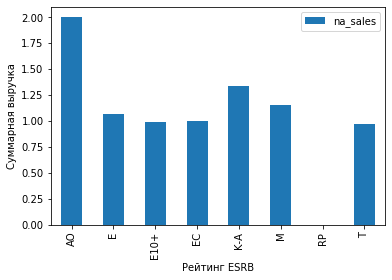

In [28]:
rating  = game_data.query('rating not in "-1"')
ax2 = rating.pivot_table(index = 'rating', values = 'na_sales').plot(kind ='bar')
ax2.set_ylabel('Суммарная выручка')
ax2.set_xlabel('Рейтинг ESRB')

Text(0.5, 0, 'Рейтинг ESRB')

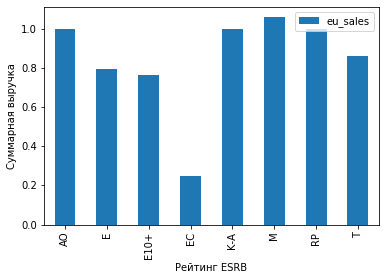

In [29]:
ax3 = rating.pivot_table(index = 'rating', values = 'eu_sales').plot(kind ='bar')
ax3.set_ylabel('Суммарная выручка')
ax3.set_xlabel('Рейтинг ESRB')

Text(0.5, 0, 'Рейтинг ESRB')

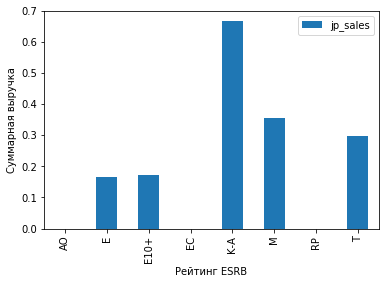

In [30]:
ax4 = rating.pivot_table(index = 'rating', values = 'jp_sales').plot(kind ='bar')
ax4.set_ylabel('Суммарная выручка')
ax4.set_xlabel('Рейтинг ESRB')

Text(0.5, 0, 'Рейтинг ESRB')

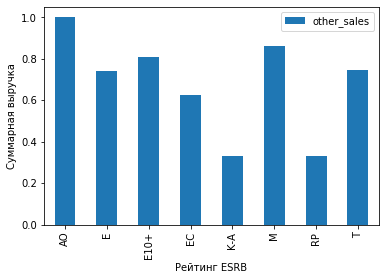

In [31]:
ax5 = rating.pivot_table(index = 'rating', values = 'other_sales').plot(kind ='bar')
ax5.set_ylabel('Суммарная выручка')
ax5.set_xlabel('Рейтинг ESRB')

Вывод: Так же и с рейтингами от ERSB отличия по севеной америке, дргуих странах и европеской части не отличаются. А вот Япония выделилась вновь. 

## Шаг 5. 

H0 : Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 
H1 : Средние пользовательские рейтинги платформ Xbox One и PC отличаются. 
alpha = 0.05

In [32]:
XOne = game_data.query('platform == "XOne" and user_score not in "-1"')
rv1=scipy.stats.norm.rvs(XOne['user_score'])
PC = game_data.query('platform == "PC" and user_score not in "-1"')
rv2=scipy.stats.norm.rvs(PC['user_score'])

In [33]:
scipy.stats.ttest_ind(rv1, rv2, equal_var = False)

Ttest_indResult(statistic=-2.9698755079734536, pvalue=0.003224609176136752)

Вывод: pvalue меньше заданного значения alpha,а значит отвергаем гипотезу H0. 

H0 : Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports одинаковые. 
H1 : Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports разные.

In [34]:
Action = game_data.query('genre == "Action" and user_score not in "-1"')
rv3=scipy.stats.norm.rvs(XOne['user_score'])
Sports = game_data.query('genre == "Sports" and user_score not in "-1"')
rv4=scipy.stats.norm.rvs(Sports['user_score'])

In [35]:
scipy.stats.ttest_ind(rv3, rv4, equal_var = False)

Ttest_indResult(statistic=-2.4380664973143946, pvalue=0.015389257380021396)

Вывод: pvalue меньше заданного значения alpha,а значит отвергаем гипотезу H0. 

## Шаг 6.  Вывод:

В данной работе были проделаны следующие шаги: 

- Была произведена предработка данных и привидение к нужному типу. 
- Был проведен исследовательский анализ: 

Исследовали платформы, были вычислены самые прибыльные платформы по всем площадкам:

- 3DS
- DS
- PS3
- PS4
- Wii
- WiiU
- X360

Так же выделили актуальный период на основе которого мы проводили последующий анализ: 2006 - 2016. Посмотрели как сильно отличается выручка по платформам  и так же  средняя выручка. Самой прибыльной платформой оказалась: X360. 

Выделили жанры, которые пользуются спросом: Action, Mist,Sports. Жанры, которые увы не пользуются спросом: Fighting, platform. 

Описали портрет пользователя каждого региона:  
 - Выделили Самые популярные платформы. Вычислили долю продаж, по доле продаж лидирует Япония. 
- Выделили самые популярные жанры. В трех регионах лидирующие жанры не отличаются, а вот в Японии совершенно другие интересы. 
- Влияет ли рейтинг ESRB на продажи в отдельном регионе: та же самая ситуация с рейтингом ESRB, выделяется Япония. 

Проверка гипотез: 

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые:  pvalue меньше заданного значения alpha,а значит отвергаем гипотезу H0. 

- Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные:pvalue меньше заданного значения alpha,а значит отвергаем гипотезу H0.  